In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
mpg_df = sns.load_dataset("mpg")
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [7]:
corr = mpg_df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Heat Map of the MPG

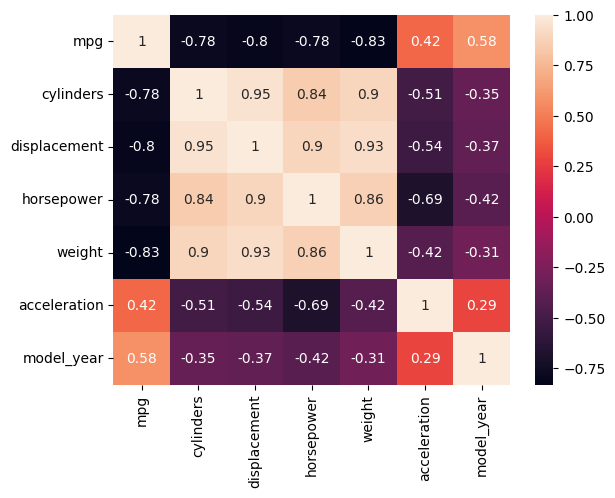

In [8]:
ax = sns.heatmap(corr,annot=True)

Scatter Plot

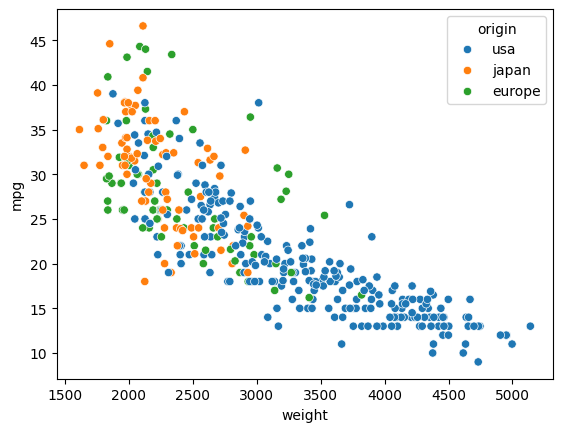

In [10]:
ax = sns.scatterplot(
    x='weight',
    y='mpg',
    hue='origin',
    data=mpg_df
)

Static Hexagonal Binning Plot

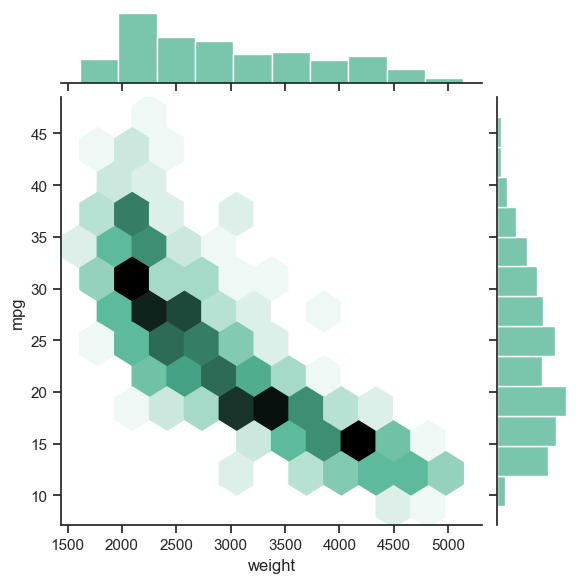

In [11]:
sns.set(style='ticks')
sns.jointplot(x=mpg_df.weight,
              y=mpg_df.mpg,
              kind='hex',
              color='#4CB391')

Pair Plot

In [13]:
mpg_df_col = mpg_df[['cylinders','displacement','horsepower','weight','mpg']]
mpg_df_col

,cylinders,displacement,horsepower,weight,mpg
0,8,307.0,130.0,3504,18.0
1,8,350.0,165.0,3693,15.0
2,8,318.0,150.0,3436,18.0
3,8,304.0,150.0,3433,16.0
4,8,302.0,140.0,3449,17.0
...,...,...,...,...,...
393,4,140.0,86.0,2790,27.0
394,4,97.0,52.0,2130,44.0
395,4,135.0,84.0,2295,32.0
396,4,120.0,79.0,2625,28.0


[]

<Figure size 600x600 with 0 Axes>

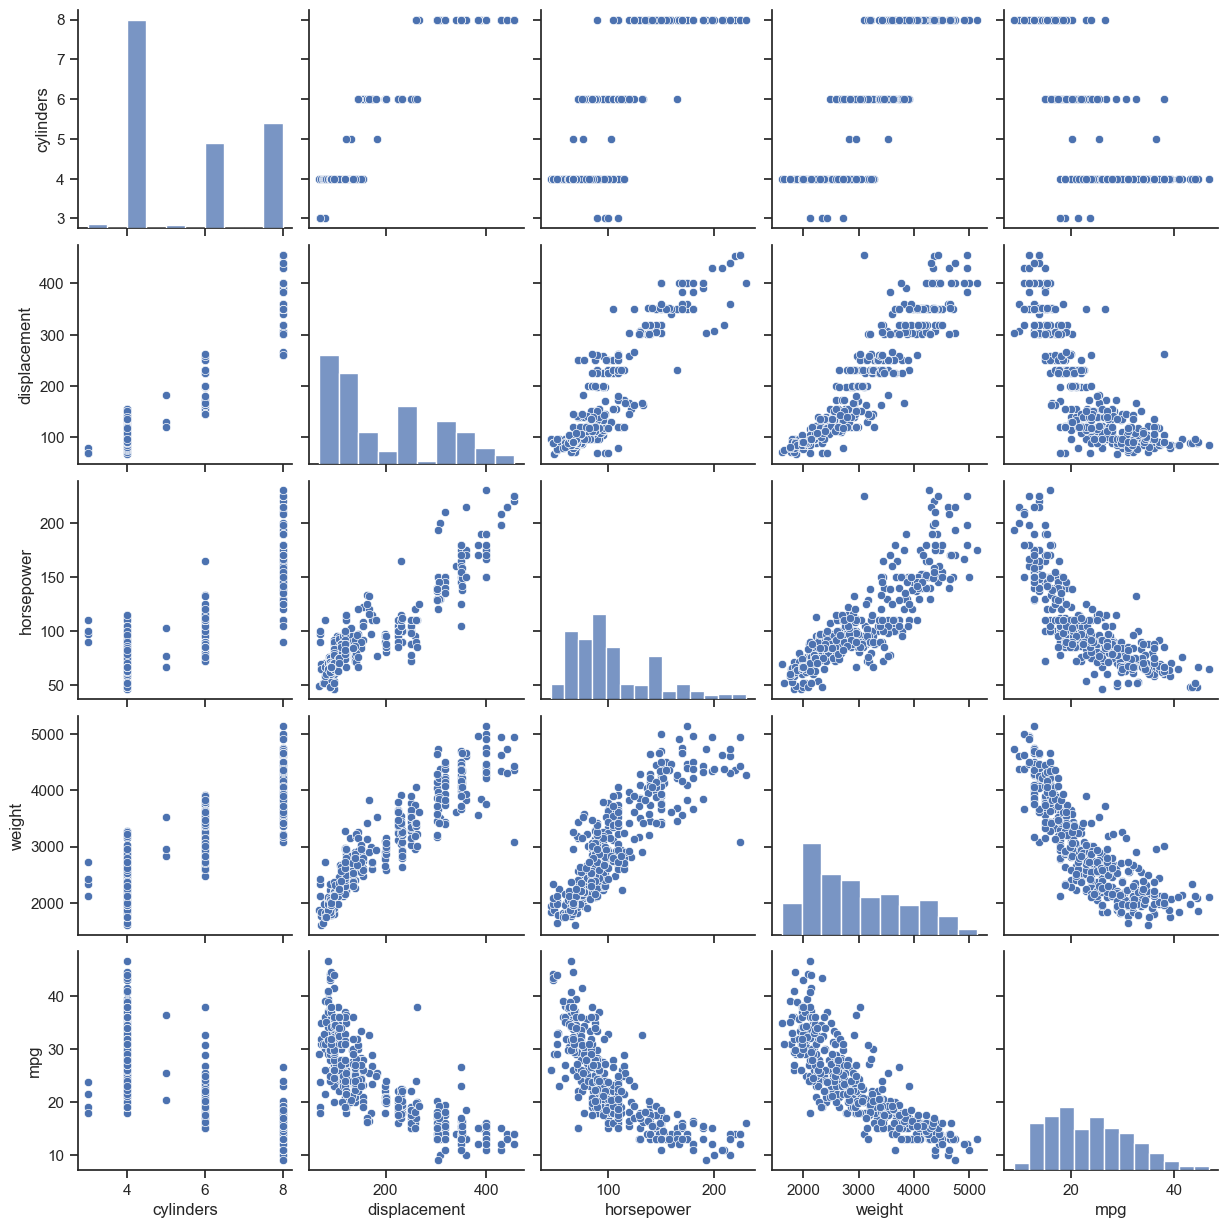

In [14]:
plt.figure(figsize=(6,6))
sns.pairplot(mpg_df_col)

plt.plot()

Highest/lowest order by mpg

In [15]:
mpg_df[['mpg','name']].nlargest(n=5,columns=['mpg'])

,mpg,name
322,46.6,mazda glc
329,44.6,honda civic 1500 gl
325,44.3,vw rabbit c (diesel)
394,44.0,vw pickup
326,43.4,vw dasher (diesel)


In [16]:
mpg_df[['mpg','name']].nsmallest(n=5,columns=['mpg'])

,mpg,name
28,9.0,hi 1200d
25,10.0,ford f250
26,10.0,chevy c20
27,11.0,dodge d200
67,11.0,mercury marquis


Histogram by Model Year

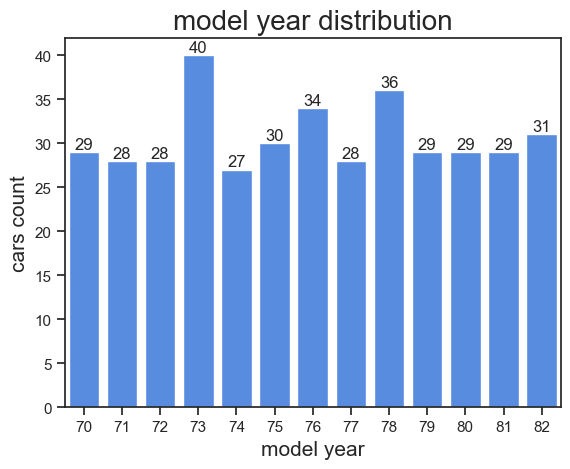

In [17]:
plt.Figure(figsize=(10,5))
ax = sns.countplot(x='model_year',
                   data=mpg_df,
                   color='#4287f5'
                   )
ax.bar_label(ax.containers[0],label_type='edge')
plt.title('model year distribution',fontsize=20)
plt.xlabel('model year',fontsize=15)
plt.ylabel('cars count',fontsize=15)
plt.show()

Box plot with model_year and mpg

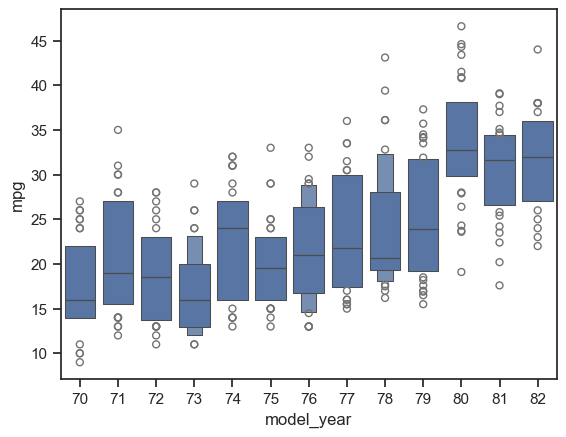

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxenplot(x='model_year',
              y='mpg',
              data=mpg_df)
plt.show()

In [19]:
import numpy as np

mpg_df['model_decade'] = np.floor(mpg_df.model_year/10)*10
mpg_df['model_decade'] = mpg_df['model_decade'].astype(int)
mpg_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,model_decade
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,80
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,80
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,80
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,80
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,80


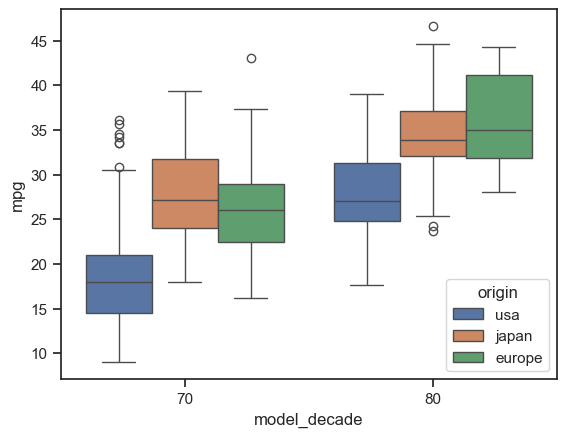

In [20]:
sns.boxplot(x='model_decade',
            y='mpg',
            data=mpg_df,
            hue='origin'
            )
plt.show()

Violin Plot

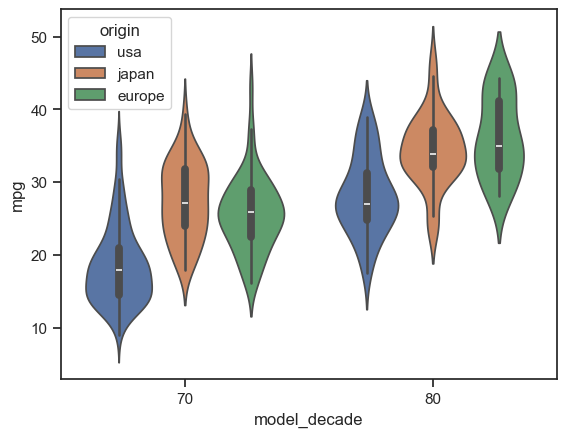

In [ ]:
sns.violinplot(x='model_decade',
               y='mpg',
               data=mpg_df,
               hue='origin')
plt.show()